# Post processing example

In [1]:
import sys
sys.path.insert(0,'../../src')
sys.path.insert(0,'../../src/models')
ROOT_DIR = '../../Data/'
from utilities import *  

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Select the model where the prediction come from, and the prediction name

In [2]:
from model_vgg_no_data_augmentation import MODEL_CLASS

MODEL = MODEL_CLASS()
MODEL.summary()

PredictionName = MODEL.PredictionName

Main model attributes:
	patch_size =  16
	input_size =  64
	pad_size =  24
	pad_rotate_size =  47
	final_layer_units =  1
	pool_size =  (2, 2)

Training parameters:
	learning_rate =  0.001
	epochs =  40
	batch_size =  125
	steps_per_epoch =  250

Oher attributes:
	NameWeights =  model_vgg_no_data_aug_weights
	SubmissionName =  model_vgg_no_data_aug_sub.csv
	PredictionName =  model_vgg_no_data_aug_pred

 Keras model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 6

# Visualize post-processing

In [3]:
#load images and pad them
test_images = pick_test_images(root_dir = ROOT_DIR)

In [4]:
# Getting back the objects:
with open('model_vgg_2_neurons_prediction.dms', 'rb') as f: 
    test_predicted_1D = pickle.load(f)
print('Recovered!')
test_labels = test_predicted_1D.reshape(50,-1)
print(test_labels.shape)

Recovered!
(50, 1444)


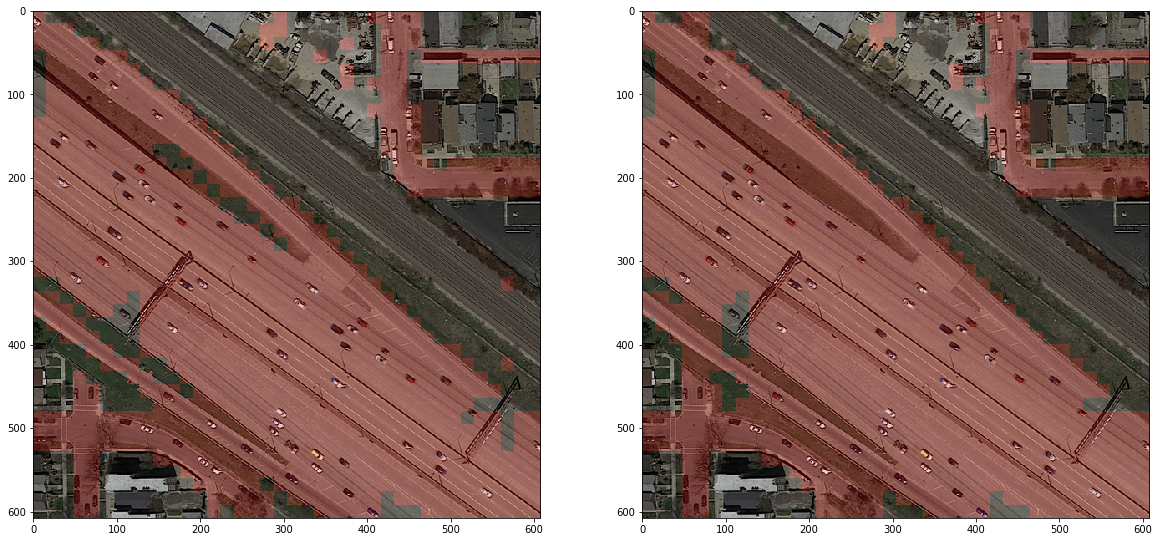

In [5]:
IDX = 8
patches_38x38 = test_labels[IDX].reshape(38,38)
post_processed_patches = post_process_single(patches_38x38)

post_processed_image = label_to_img(608, 608, 16, 16, post_processed_patches.reshape(38*38))

predicted_image_IDX = VisualizePrediction('model_vgg_2_neurons_prediction.dms', IDX, 608, PLOT= False)
new_img = make_img_overlay(test_images[IDX], predicted_image_IDX)

new_img2 = make_img_overlay(test_images[IDX], post_processed_image)

plt.figure(figsize=[20,30])
plt.subplot(1,2,1)
plt.imshow(new_img)
plt.subplot(1,2,2)
plt.imshow(new_img2)

# Post-process all the images, and then create submission

In [6]:
post_process_and_submit('model_vgg_2_neurons_prediction.dms', 'model_vgg_2_neurons_prediction_post_proc_90.csv')

Recovering prediction from:  model_vgg_2_neurons_prediction.dms
Recovered! Shape:  (50, 1444)
Post processing...
Generating submission...
Submission saved in:  model_vgg_2_neurons_prediction_post_proc_90.csv
